***CUREYA WEEK 4 TASK - TITANIC SURVIVAL PROJECT***

Name: ***Shreyash Sanjay Sarage*** | shreyashsarage56@gamil.com

***Importing all the necessary libraries***

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier
from xgboost import plot_importance
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from warnings import filterwarnings
filterwarnings(action='ignore')

***Loading Dataset***

In [4]:
url1 = "https://raw.githubusercontent.com/shreyash1401/Cureya/main/test.csv"
test = pd.read_csv(url1)
test_df = pd.read_csv(url1)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
url2 = "https://raw.githubusercontent.com/shreyash1401/Cureya/main/train.csv"
train = pd.read_csv(url2)
train_df = pd.read_csv(url2)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***Check for Null Values***

In [6]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


***Data Summarisation***

In [8]:
print(test.shape)

(418, 11)


In [9]:
print(train.shape)

(891, 12)


In [10]:
print(test.head(10))

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S
5          897       3  ...   NaN        S
6          898       3  ...   NaN        Q
7          899       2  ...   NaN        S
8          900       3  ...   NaN        C
9          901       3  ...   NaN        S

[10 rows x 11 columns]


In [11]:
print(train.head(10))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]


In [12]:
print(test.tail(10))

     PassengerId  Pclass  ... Cabin Embarked
408         1300       3  ...   NaN        Q
409         1301       3  ...   NaN        S
410         1302       3  ...   NaN        Q
411         1303       1  ...   C78        Q
412         1304       3  ...   NaN        S
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[10 rows x 11 columns]


In [13]:
print(train.tail(10))

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
881          882         0       3  ...   7.8958   NaN         S
882          883         0       3  ...  10.5167   NaN         S
883          884         0       2  ...  10.5000   NaN         S
884          885         0       3  ...   7.0500   NaN         S
885          886         0       3  ...  29.1250   NaN         Q
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[10 rows x 12 columns]


In [14]:
print(train.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [15]:
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


***Data Visualization***

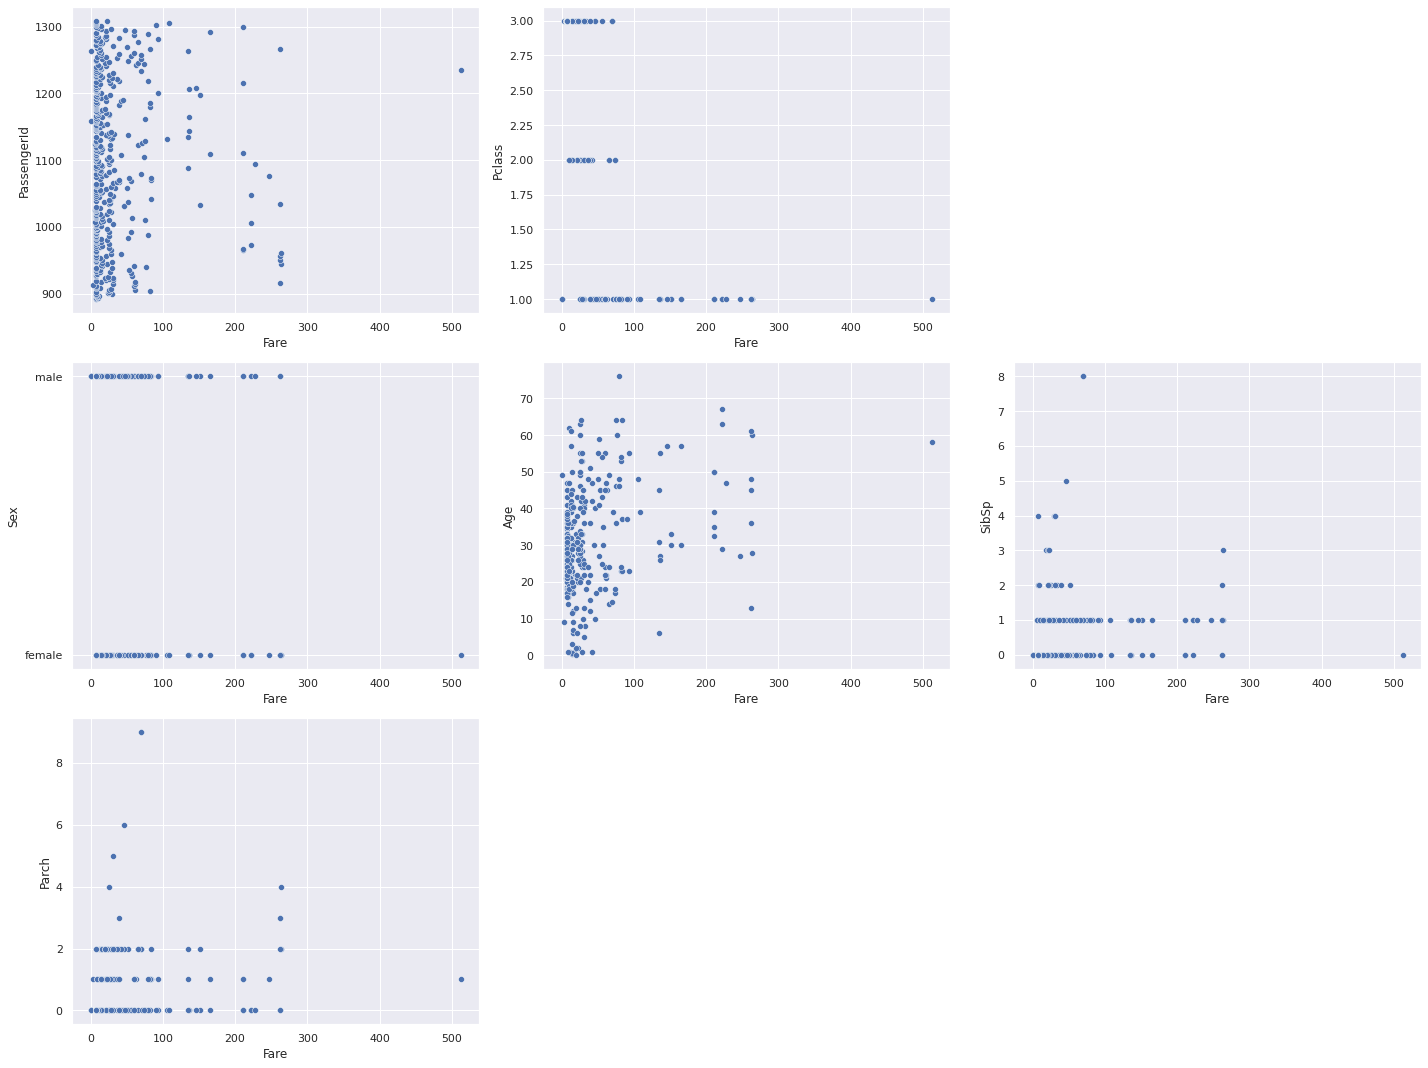

In [16]:
plt.figure(figsize= (20,15))
plotnumber = 1
for column in test:
    if plotnumber<3 or 3<plotnumber<=7 :
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = test['Fare'], y = test[column])
    plotnumber += 1

plt.tight_layout()
plt.show()

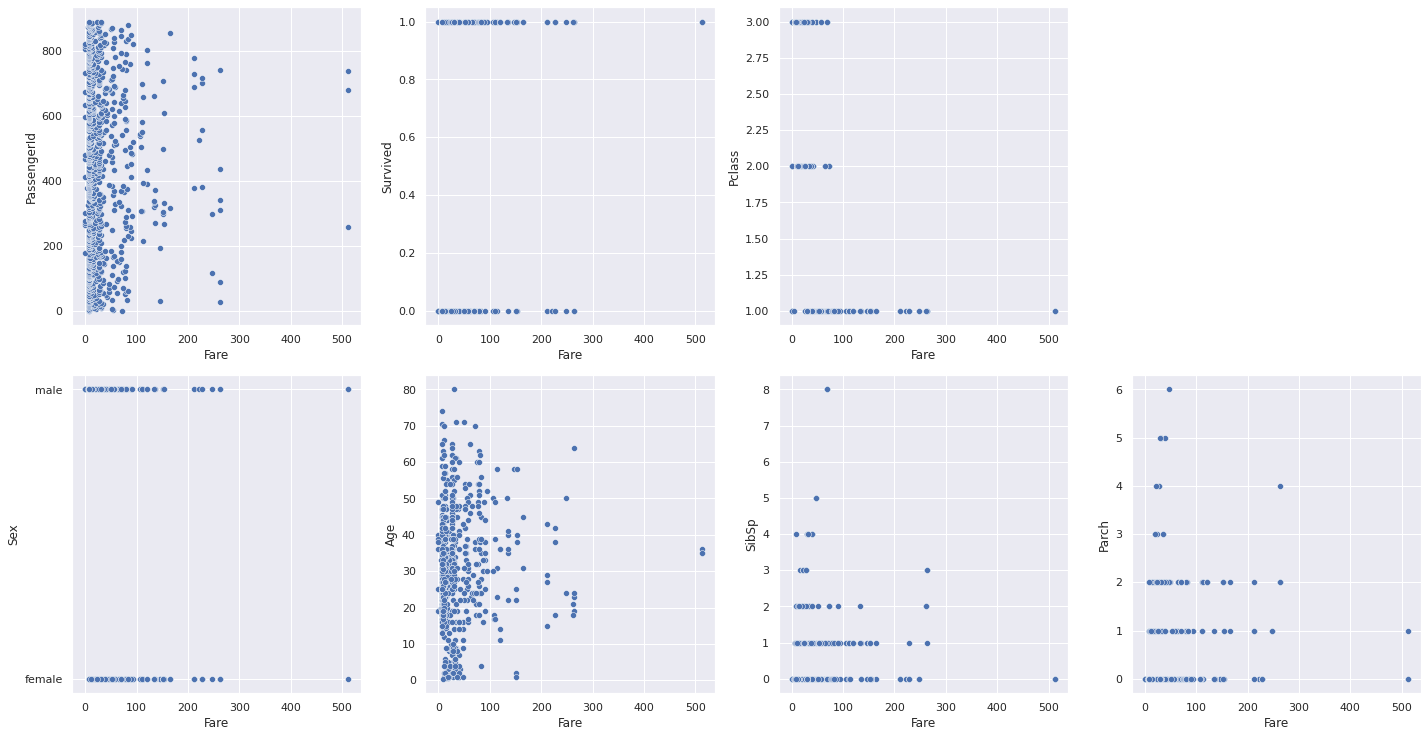

In [20]:
plt.figure(figsize= (20,15))
plotnumber = 1

for column in train:
    if plotnumber <=3 or 4<plotnumber<=8:
        ax = plt.subplot(3,4,plotnumber)
        sns.scatterplot(x = train['Fare'], y = train[column])

    plotnumber += 1
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show>

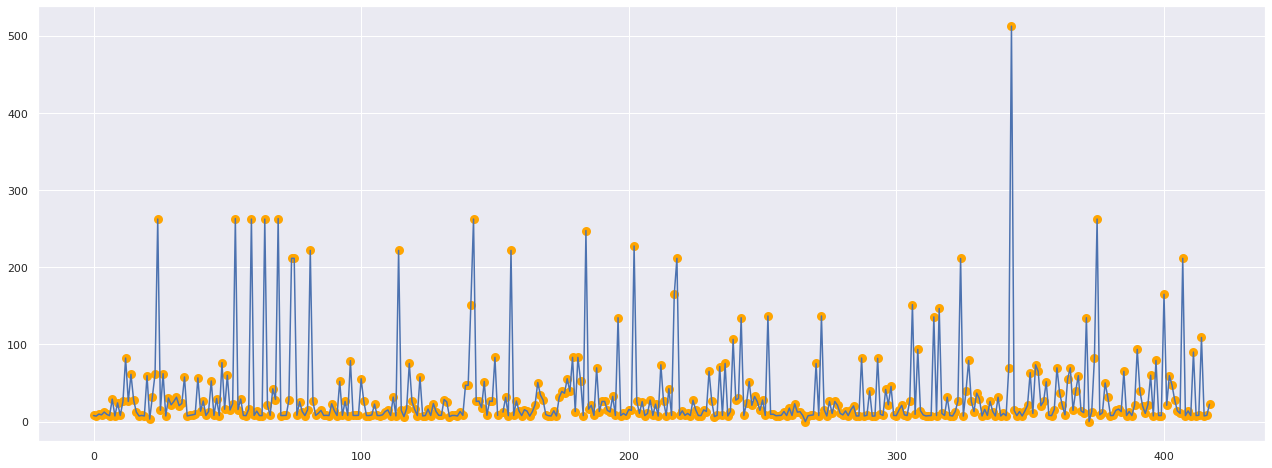

In [23]:
plt.figure(figsize=(22,8))
plt.scatter(test.index,test["Fare"],color="orange",lw=3)
plt.plot(test.index,test["Fare"])
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

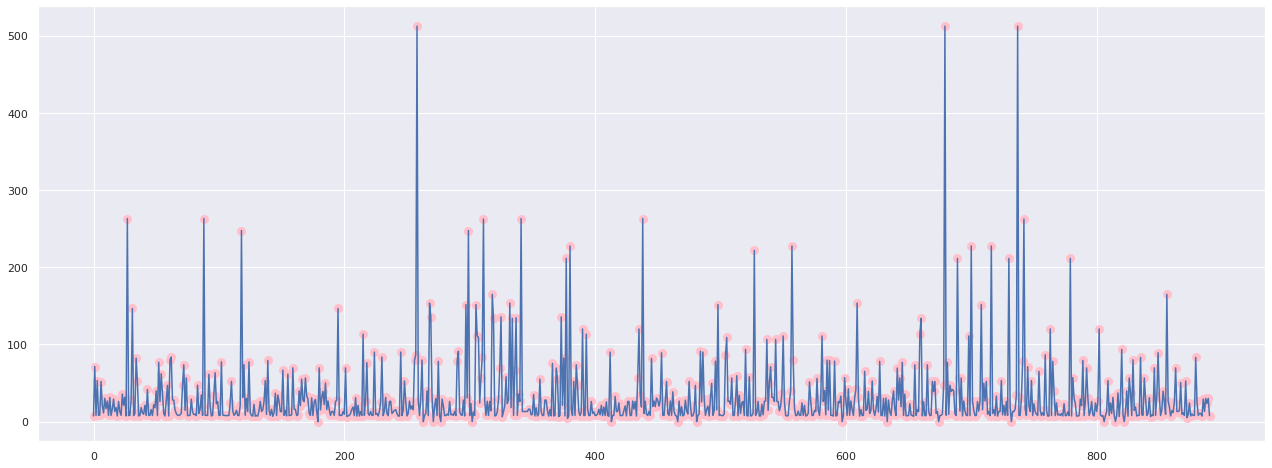

In [24]:
plt.figure(figsize=(22,8))
plt.scatter(train.index,train["Fare"],color="pink",lw=3)
plt.plot(train.index,train["Fare"])
plt.grid(True)
plt.show

In [26]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print("Survived: %i (%.1f%%)"%(len(survived),float(len(survived))/len(train)*100.0))
print("Survived: %i (%.1f%%)"%(len(not_survived),float(len(not_survived))/len(train)*100.0))
print("Total: %i"%len(train))

Survived: 342 (38.4%)
Survived: 549 (61.6%)
Total: 891


*Finding realtions between features and survival*

**1) Pclass v/s Survival**

In [27]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
pclass_survived = train.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

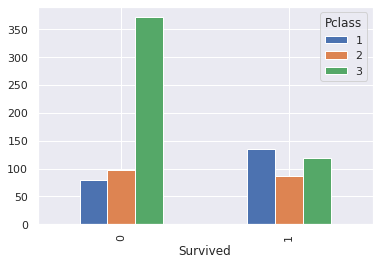

In [29]:
pclass_survived.unstack(level=0).plot(kind='bar',subplots=False)

In [30]:
pclass_survived_average = train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


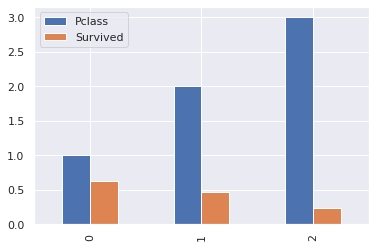

In [31]:
pclass_survived_average.plot(kind='bar',subplots=False)

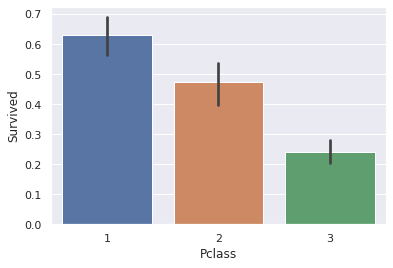

In [32]:
sns.barplot(x='Pclass',y='Survived',data=train)

2) *Sex v/s Survival*

In [33]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
sex_survival = train.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

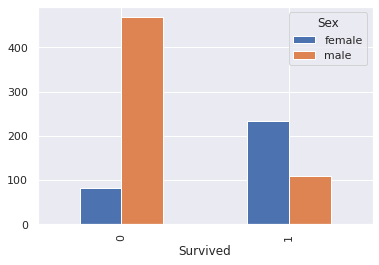

In [42]:
sex_survival.unstack(level=0).plot(kind='bar',subplots=False)

In [38]:
sex_survival_average = train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
sex_survival_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


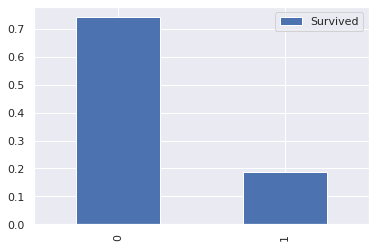

In [43]:
sex_survival_average.plot(kind='bar',subplots=False)

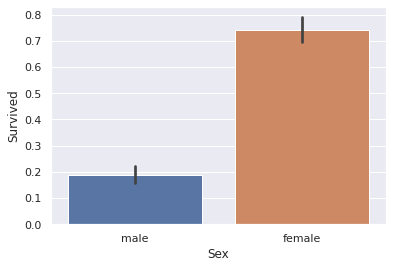

In [44]:
sns.barplot(x='Sex',y='Survived',data=train)

3) *Pclass & Sex v/s Survival*

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

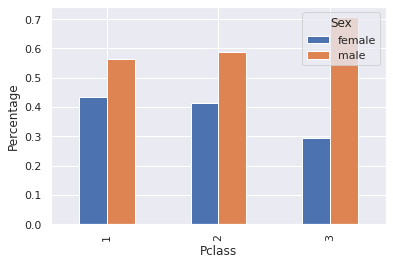

In [45]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

# sum(1) means the sum across axis 1.
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

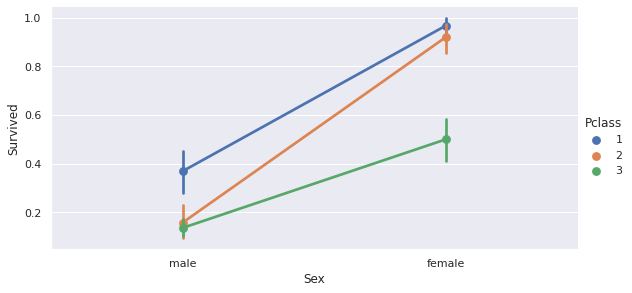

In [46]:
sns.factorplot('Sex','Survived',hue='Pclass',size=4,aspect=2,data=train)

4) Pclass, Sex & Embarked v/s Survival

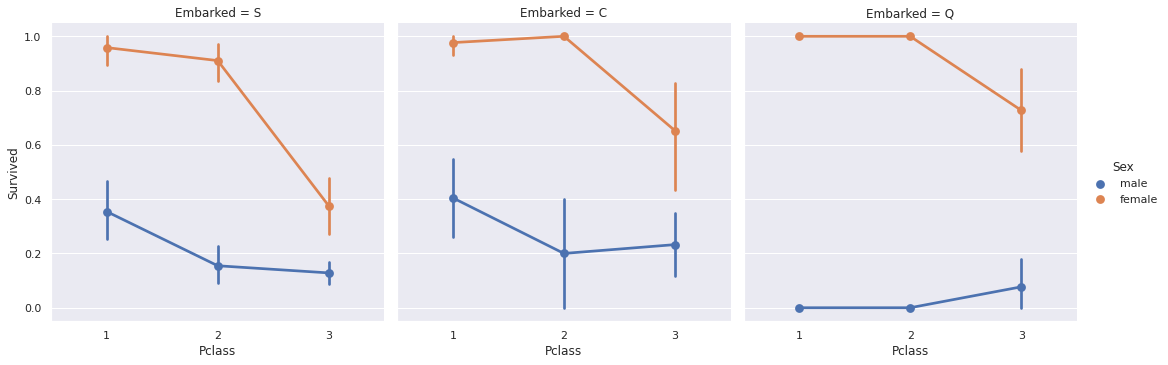

In [47]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=train)


5) *Embarked vs. Survived*

In [48]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [50]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


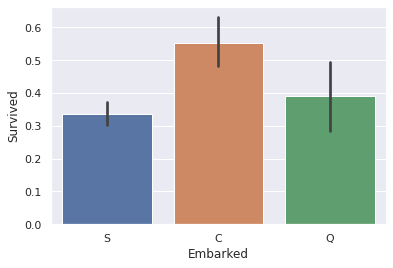

In [51]:
sns.barplot(x='Embarked', y='Survived', data=train)


6) *Parch vs. Survival*

In [52]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [53]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [54]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


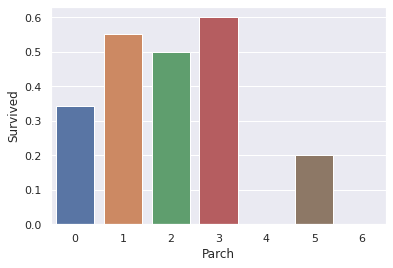

In [55]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

In [56]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


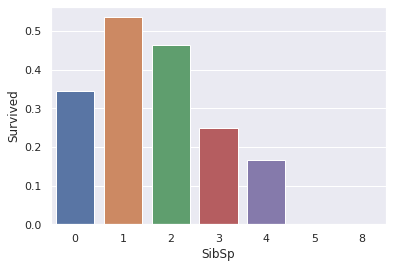

In [57]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

8) *Age v/s Survival*

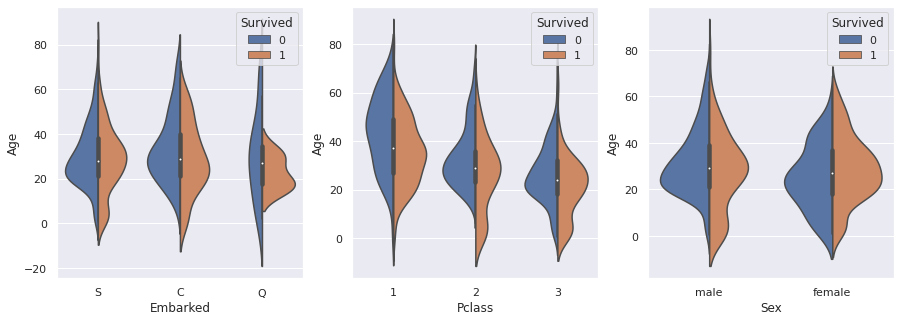

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

*Plotting some distribution plots based on survival's sex*

In [59]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]

male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]

male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

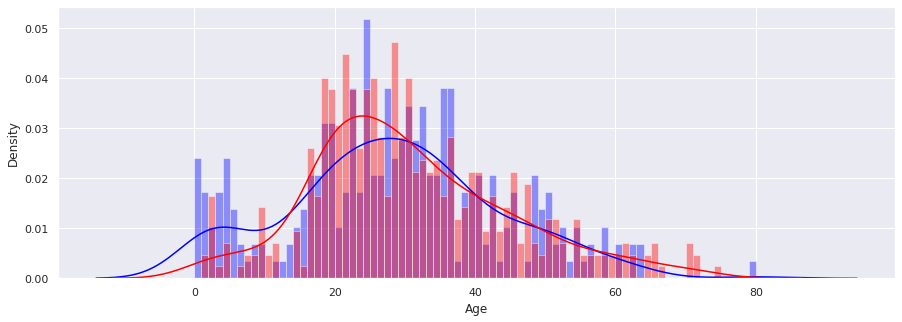

In [60]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age')

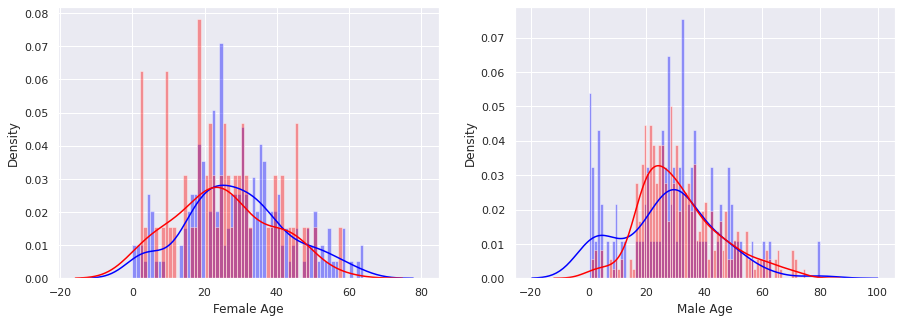

In [61]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age')

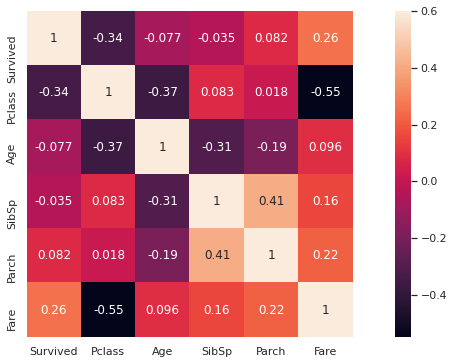

In [62]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

1) ***Name Feature***

In [63]:
# combining train and test dataset
train_test_data = [train, test]

# extracting titles from Name column.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [65]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


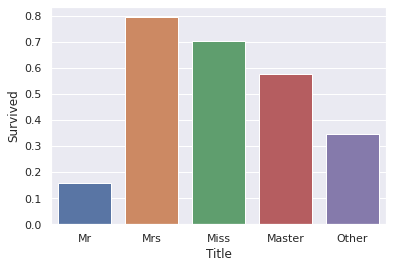

In [67]:
sns.barplot(x='Title', y='Survived', ci=None, data=train)

In [68]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [69]:
titanic_df = pd.concat([train, test], axis=0, ignore_index=True, sort=True)

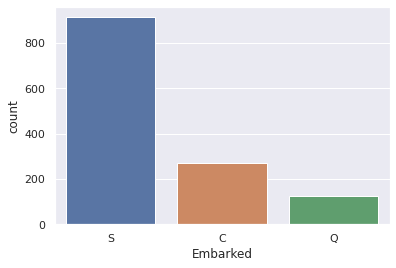

In [70]:
sns.countplot(x='Embarked', data=titanic_df)

In [71]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(value='S')

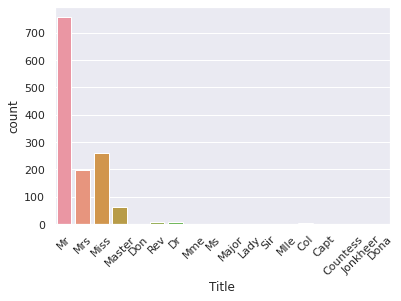

In [72]:
import re

titanic_df['Title'] = titanic_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

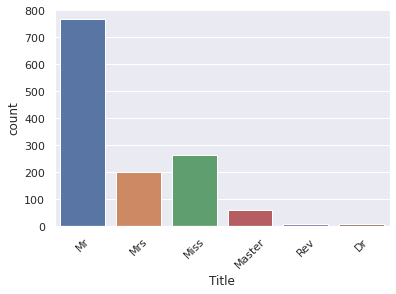

In [73]:
titanic_df['Title'] = titanic_df['Title'].replace({'Mlle': 'Miss', 
                                                   'Major': 'Mr', 
                                                   'Col': 'Mr', 
                                                   'Sir': 'Mr', 
                                                   'Don': 'Mr', 
                                                   'Mme': 'Miss', 
                                                   'Jonkheer': 'Mr', 
                                                   'Lady': 'Mrs', 
                                                   'Capt': 'Mr', 
                                                   'Countess': 'Mrs', 
                                                   'Ms': 'Miss', 
                                                   'Dona': 'Mrs'})

sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

In [74]:

titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = titanic_df.groupby('Title')['Age'].median()[titles.index(title)]
    titanic_df.loc[(titanic_df['Age'].isnull()) & (titanic_df['Title'] == title), 'Age'] = age_to_impute
    titanic_df['Familial'] = (titanic_df['SibSp'] + titanic_df['Parch']) > 0

In [75]:
medianFare = titanic_df[titanic_df['Pclass'] == 3]['Fare'].median()
titanic_df['Fare'] = titanic_df['Fare'].fillna(value = medianFare)

custom_bucket_array = np.linspace(0, 80, 17)
titanic_df['CatAge'] = pd.cut(titanic_df['Age'], custom_bucket_array)
labels, levels = pd.factorize(titanic_df['CatAge'])
titanic_df['CatAge'] = labels
custom_bucket_array

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80.])

In [76]:
custom_bucket_array = np.linspace(0, 520, 53)
titanic_df['CatFare'] = pd.cut(titanic_df['Fare'], custom_bucket_array)
labels, levels = pd.factorize(titanic_df['CatFare'])
titanic_df['CatFare'] = labels
custom_bucket_array

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520.])

In [77]:
titanic_df['SexBool'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['EmbarkedInt'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
titanic_df['TitleInt'] = titanic_df['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rev':4, 'Dr':5})
train_len = len(train_df)
train_df = titanic_df.loc[titanic_df['PassengerId'] <= train_len]
test_df = titanic_df.loc[titanic_df['PassengerId'] > train_len].iloc[:, titanic_df.columns != 'Survived']

(len(train_df), len(test_df))

(891, 418)

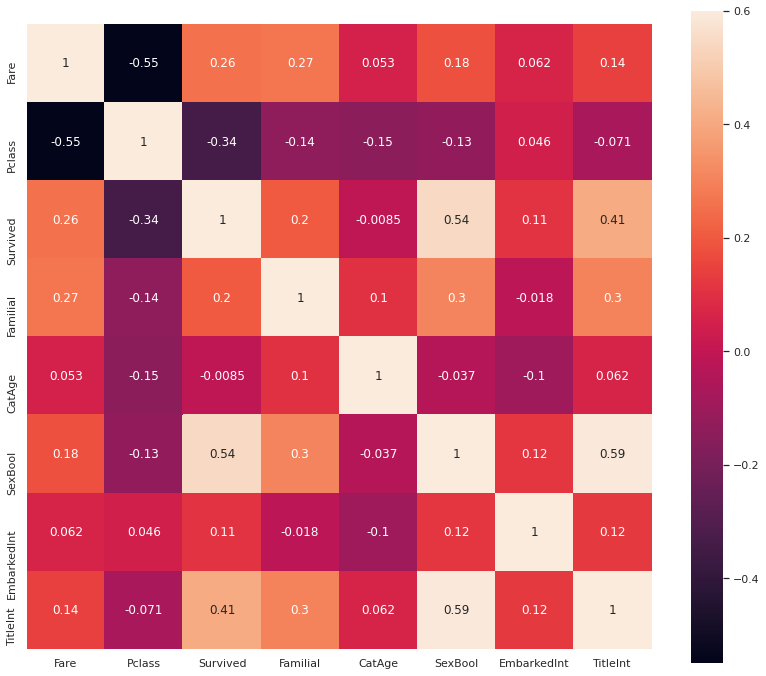

In [78]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train_df.drop(['PassengerId', 'Name', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'CatFare', 'Cabin', 'Embarked']
                                ,axis=1).corr(), vmax=0.6, square=True, annot=True)

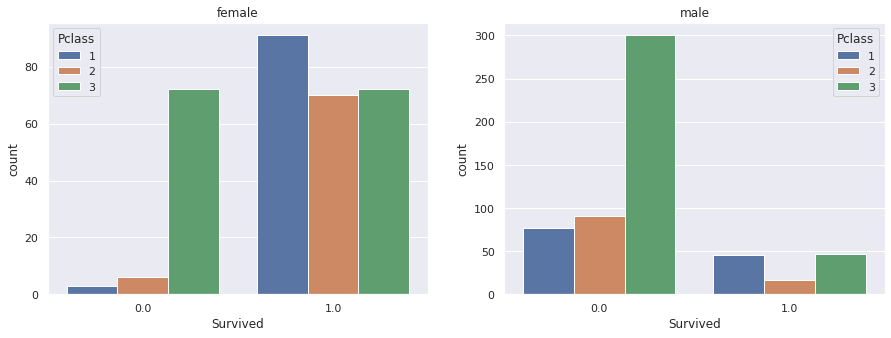

In [79]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df.loc[titanic_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df.loc[titanic_df['Sex'] == 'male'], ax=axs[1])

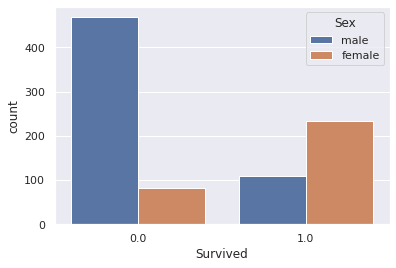

In [80]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

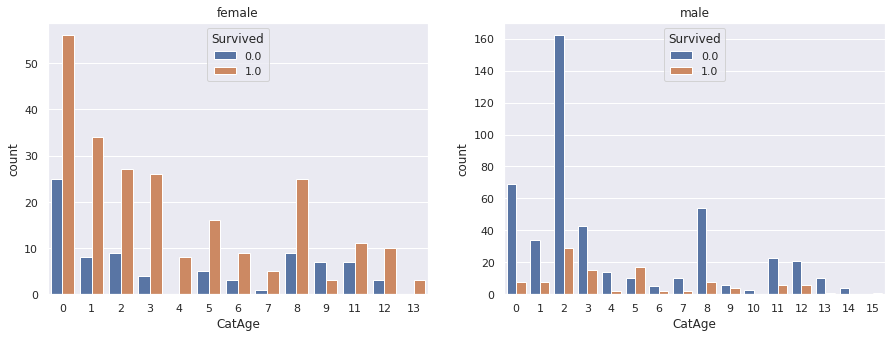

In [81]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='CatAge', hue='Survived', data=train_df.loc[train_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='CatAge', hue='Survived', data=train_df.loc[train_df['Sex'] == 'male'], ax=axs[1])

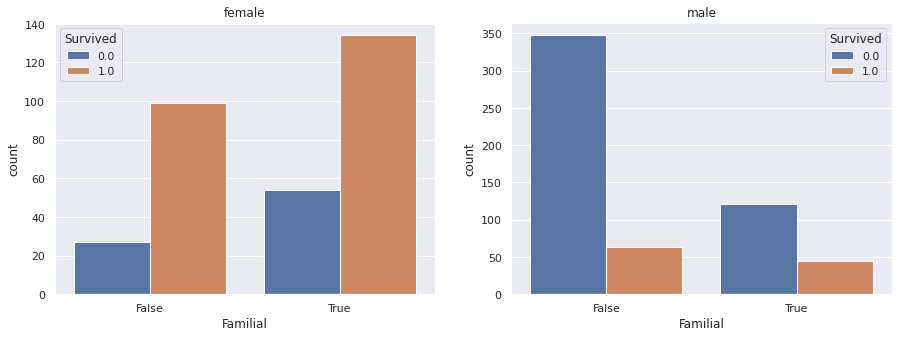

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Familial', hue='Survived', data=train_df.loc[train_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Familial', hue='Survived', data=train_df.loc[train_df['Sex'] == 'male'], ax=axs[1])

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


***Sex Feature***

In [84]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


***Embarked Feature***

In [86]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [90]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


***Age Feature***

In [91]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.526316
1   (16.0, 32.0]  0.348315
2   (32.0, 48.0]  0.380952
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


In [93]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


***Fare Feature***

In [95]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [96]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [97]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


In [98]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


In [100]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [101]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,1,0,0,1
1,1,1,1,2,3,1,3
2,1,3,1,1,1,0,2
3,1,1,1,2,3,0,3
4,0,3,0,2,1,0,1


In [102]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,3
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,3


***Classification & Accuracy***

In [103]:

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

***Logistic Regression***

*Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.*

In [104]:

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 80.47%


***Random Forest***

In [105]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_random_forest) + '%')

Train Accuracy: 86.31%


***Support Vector Machine (SVM)***

In [106]:

clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 83.05%


***XGBoost***

In [107]:
Columns = ['SexBool', 'Pclass', 'Fare', 'CatAge', 'Familial', 'EmbarkedInt', 'TitleInt']
Label = 'Survived'

train_X = train_df.loc[:, train_df.columns != 'Survived']
train_y = train_df['Survived']

model = XGBClassifier()

both_scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Loss':'neg_log_loss'}
params = {
        'n_estimators': [100, 200, 500, 1000, 1500],
        'learning_rate': [0.05, 0.1, 0.2]
        #'max_depth':[3, 4, 5]
        }

In [108]:
clf = GridSearchCV(model, params, cv=5, scoring=both_scoring, refit='AUC', return_train_score=True)
clf.fit(train_X[Columns], train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit='A

In [109]:
print((clf.best_score_, clf.best_params_))
print("="*30)

print("Grid scores on training data:")
means = clf.cv_results_['mean_test_AUC']
stds = clf.cv_results_['std_test_AUC']
log_losses = clf.cv_results_['std_test_Loss']

for mean, std, log_loss, params in zip(means, stds, log_losses, clf.cv_results_['params']):
    print("AUC Score: %0.3f (+/-%0.03f); Log Loss: %0.3f for %r" % (mean, std * 2, log_loss, params))

(0.8739526918211894, {'learning_rate': 0.1, 'n_estimators': 200})
Grid scores on training data:
AUC Score: 0.870 (+/-0.050); Log Loss: 0.038 for {'learning_rate': 0.05, 'n_estimators': 100}
AUC Score: 0.869 (+/-0.061); Log Loss: 0.049 for {'learning_rate': 0.05, 'n_estimators': 200}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.058 for {'learning_rate': 0.05, 'n_estimators': 500}
AUC Score: 0.872 (+/-0.058); Log Loss: 0.067 for {'learning_rate': 0.05, 'n_estimators': 1000}
AUC Score: 0.871 (+/-0.060); Log Loss: 0.079 for {'learning_rate': 0.05, 'n_estimators': 1500}
AUC Score: 0.870 (+/-0.061); Log Loss: 0.050 for {'learning_rate': 0.1, 'n_estimators': 100}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.055 for {'learning_rate': 0.1, 'n_estimators': 200}
AUC Score: 0.872 (+/-0.061); Log Loss: 0.068 for {'learning_rate': 0.1, 'n_estimators': 500}
AUC Score: 0.869 (+/-0.063); Log Loss: 0.087 for {'learning_rate': 0.1, 'n_estimators': 1000}
AUC Score: 0.865 (+/-0.061); Log Loss: 0.092 for {'learning

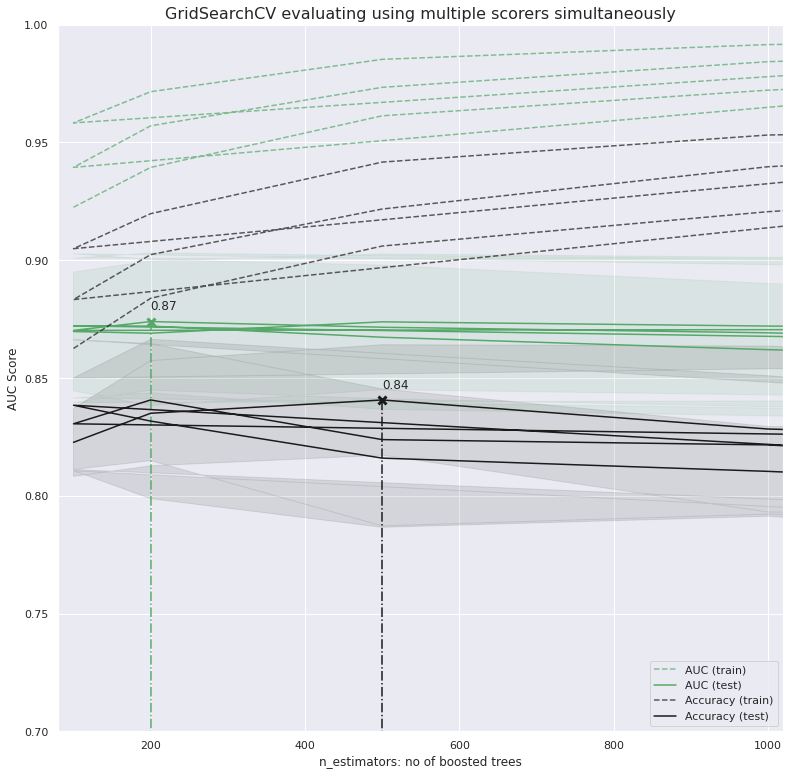

In [110]:
results = clf.cv_results_

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("n_estimators: no of boosted trees")
plt.ylabel("AUC Score")

ax = plt.gca()
ax.set_xlim(80, 1020)
ax.set_ylim(0.7, 1)

X_axis = np.array(results['param_n_estimators'].data, dtype=float)

for scorer, color in zip(sorted(both_scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [111]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_XGB = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB) + '%')

Train Accuracy: 77.78%


***Comparing Models***

In [112]:
models = pd.DataFrame({
  'Model': ['Logistic Regression', 'SVM',
            'Random Forrest','XGBOOST'],
    
    'Score': [acc_log_reg, acc_svc, acc_random_forest,acc_XGB]
    })


models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
2,Random Forrest,86.31
1,SVM,83.05
0,Logistic Regression,80.47
3,XGBOOST,77.78


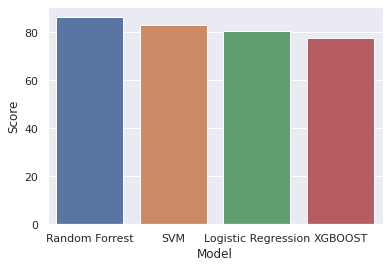

In [113]:
sns.barplot(x='Model', y='Score', ci=None, data=models)

In [114]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,3
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,3
